In [1]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [2]:
import pandas as pd
 
tb_new = pd.read_csv('/content/drive/My Drive/tb_new.csv')# Dataset is now stored in a Pandas Dataframe

print(tb_new.columns)

Index(['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp'], dtype='object')


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
tb_new["timestamp"]= pd.to_datetime(tb_new["timestamp"]) 

In [0]:
tb_new['date'] = tb_new['timestamp'].dt.strftime('%d/%m/%Y')

In [0]:
tb_new.sort_values(by=['date'], inplace=True, ascending=True)

In [0]:
tb_new.head()


,user_id,item_id,category_id,behavior_type,timestamp,date
1928411,170980,1500112,4145813,pv,1970-01-01 12:13:36,01/01/1970
87527314,419355,418492,5053508,pv,1970-01-01 03:08:57,01/01/1970
87527315,419355,2466766,1879194,pv,1970-01-01 03:17:11,01/01/1970
87527316,419355,1902794,1879194,pv,1970-01-01 03:35:35,01/01/1970
87527317,419355,3109278,1879194,pv,1970-01-01 04:08:08,01/01/1970


In [0]:
tb_new.tail()

,user_id,item_id,category_id,behavior_type,timestamp,date
99801884,98390,1187404,2920476,pv,2017-12-31 05:25:27,31/12/2017
99801883,98390,2433216,149192,pv,2017-12-31 05:24:46,31/12/2017
99801882,98390,4412076,149192,pv,2017-12-31 05:23:49,31/12/2017
99801861,98390,1609929,2920476,pv,2017-12-31 04:52:21,31/12/2017
99801820,98390,4935505,982926,pv,2017-12-31 02:46:05,31/12/2017


I noticed there are invalid dates in the timestamp column e.g. 01/01/1970. I only save valid dates within time period 25/11/2017 to 03/12/2017 for analysis.

In [0]:
tb_new = tb_new[(tb_new['date'] =='25/11/2017') | (tb_new['date'] =='26/11/2017') | (tb_new['date'] =='27/11/2017') | (tb_new['date'] =='28/11/2017') | (tb_new['date'] =='29/11/2017') | (tb_new['date'] =='30/11/2017') | (tb_new['date'] =='01/12/2017') | (tb_new['date'] =='02/12/2017') | (tb_new['date'] =='03/12/2017')]

In [0]:
tb_new.shape

(98914484, 6)

In [0]:
tb_new.sort_values(by=['user_id'], inplace=True, ascending=True)

In [0]:
tb_new['user_id'].min()

1

In [0]:
tb_new['user_id'].max()

1018011

In [0]:
# I will take a sample based on user IDs, from my data for analysis and modelling.
tb_new = tb_new[tb_new['user_id']<5000]

In [0]:
tb_new.shape

(483829, 5)

In [0]:
tb_new.head()

,user_id,item_id,category_id,behavior_type,timestamp,date
66504388,3777,4695412,2562909,pv,2017-12-01 01:31:12,01/12/2017
66504387,3777,1934018,2562909,pv,2017-12-01 01:27:58,01/12/2017
66504386,3777,2737791,2562909,pv,2017-12-01 01:26:19,01/12/2017
66504385,3777,1518674,2562909,pv,2017-12-01 01:24:49,01/12/2017
66504384,3777,310572,1376358,pv,2017-12-01 00:54:15,01/12/2017


In [0]:
tb_new.to_csv('/content/drive/My Drive/tb_final.csv', index=False)
#saved as separate csv for further work on recommender system in a separate notebook.

In [0]:
import pandas as pd
tb_final = pd.read_csv('/content/drive/My Drive/tb_final.csv')

In [5]:
tb_final['date'] = pd.to_datetime(tb_final['date'],format="%d/%m/%Y") 
tb_final.sort_values(by='date', ascending=True, inplace=True)

tb_final.dtypes

user_id                   int64
item_id                   int64
category_id               int64
behavior_type            object
timestamp                object
date             datetime64[ns]
dtype: object

In [0]:
# convert user id, item id and category id into numeric
tb_final['user'] = tb_final['user_id'].astype("category").cat.codes
tb_final['item'] = tb_final['item_id'].astype("category").cat.codes
tb_final['category'] = tb_final['category_id'].astype("category").cat.codes

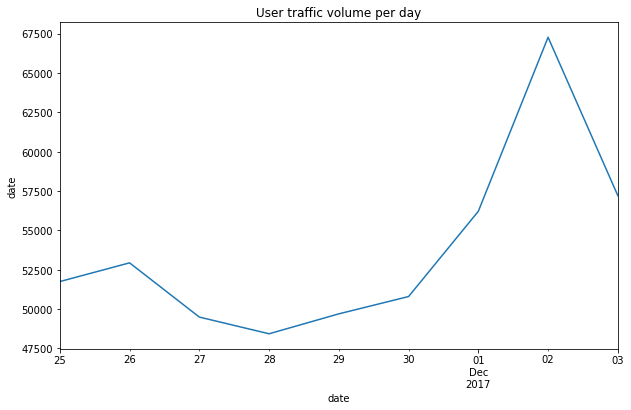

In [0]:
#Line Plot of the number of user behavior counts for each day.
plt.figure(figsize=(10,6))
plt.ylabel('date')
plt.xlabel('traffic')
plt.title("User traffic volume per day")
tb_final.groupby('date')['behavior_type'].count().plot()

There is a huge visitor volumn spike on 2 Dec 2017. Based on research, I found out that 2 Dec 2017 is a saturday, and also the first weekend after people receive their previous end of month paycheck. Consumers generally have more time to do their shopping online on weekends when they are not at work. It could also be a weekend where taobao did a weekend sale/promotion.

In [0]:
#Interactive plot to show user traffic per day. Same as above line graph.
import plotly.express as px
df = tb_final.groupby(['date'])['behavior_type'].count().reset_index(name='counts')
#df
fig = px.line(df, x="date", y="counts", title='User Traffic per day')
fig.show()

In [0]:
#Interactive plot to show user traffic per day. Same as above line graph.
df_sec = tb_final.groupby(['timestamp'])['behavior_type'].count().reset_index(name='counts')
fig = px.line(df_sec, x="timestamp", y="counts", title='User Traffic per second')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

User behavior periodically spikes at 12pm and 6pm. These are timings where people break for lunch and off-work. Taobao could launch marketing campaigns or promotions during these time periods e.g. flash sales.

pv      432477
cart     27843
fav      13976
buy       9533
Name: behavior_type, dtype: int64


Text(0.5, 1.0, 'User Behavior')

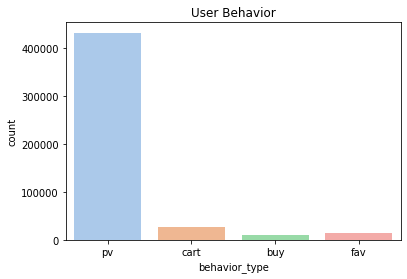

In [0]:
# Bar plot to see the count of each behaviour type.
print(tb_final['behavior_type'].value_counts())
sns.countplot(x= 'behavior_type', data=tb_final, palette="pastel")
plt.title('User Behavior')

There is a significantly larger amount of page views than all the other behavior types.

In [0]:
#Group item by its user behavior
grouped_behavior = tb_final.groupby('behavior_type')['item'].apply(list)
#grouped_behavior

In [0]:
#See the most viewed items
page_views = grouped_behavior['pv']

#convert page_views to numpy array
page_views = np.array(page_views[:])

#counting uniques values of page views
unique, counts = np.unique(page_views, return_counts=True)

# Dictionary with key as unique and value as counts
count_views = {}
count_views = dict(zip(unique, counts))



Text(0, 0.5, 'View Count')

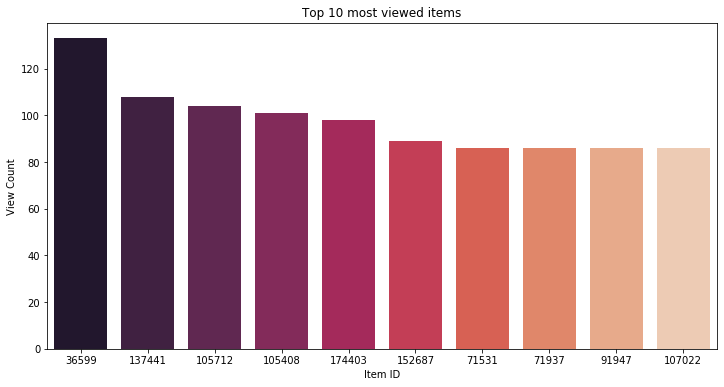

In [10]:
#sorting the dictionary
import operator
sort_views = sorted(count_views.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Item IDs
x = [i[0] for i in sort_views[:10]]

# y-axis: count of views
y = [i[1] for i in sort_views[:10]]

plt.figure(figsize=(12,6))
ax = sns.barplot(x, y, order=x, palette="rocket")
plt.title("Top 10 most viewed items")
plt.xlabel("Item ID")
plt.ylabel("View Count")

In [0]:
#See the most add to cart items
add_cart = grouped_behavior['cart']

#convert add cart to numpy array
add_cart = np.array(add_cart[:])

#counting uniques values of add to cart
cart_unique, cart_counts = np.unique(add_cart, return_counts=True)

# Dictionary with key as unique and value as counts
count_add_cart = {}
count_add_cart = dict(zip(cart_unique, cart_counts))

Text(0, 0.5, 'Cart Count')

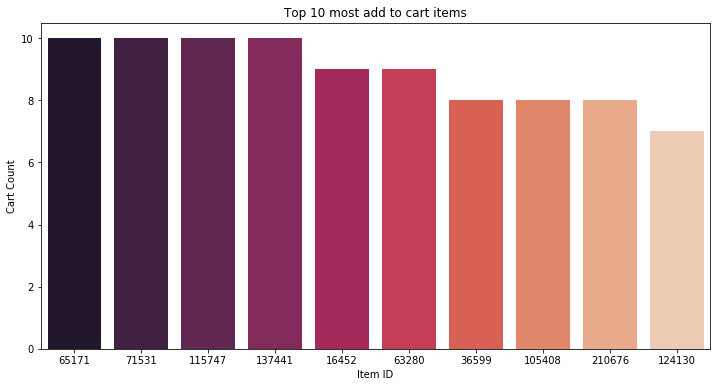

In [12]:
#sorting the dictionary
sort_add_cart = sorted(count_add_cart.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Item IDs
x_cart = [i[0] for i in sort_add_cart[:10]]

# y-axis: Add to cart count
y_cart = [i[1] for i in sort_add_cart[:10]]

plt.figure(figsize=(12,6))
ax_cart = sns.barplot(x=x_cart, y=y_cart, order=x_cart, palette="rocket")
plt.title("Top 10 most add to cart items")
plt.xlabel("Item ID")
plt.ylabel("Cart Count")

In [0]:
#See the most favorite items
fav_items = grouped_behavior['fav']

#convert favorite items to numpy array
fav_items = np.array(fav_items[:])

#counting uniques values of favorite items
fav_unique, fav_counts = np.unique(fav_items, return_counts=True)

# Dictionary with key as unique and value as counts
count_fav_items = {}
count_fav_items = dict(zip(fav_unique, fav_counts))

Text(0, 0.5, 'Favorite Count')

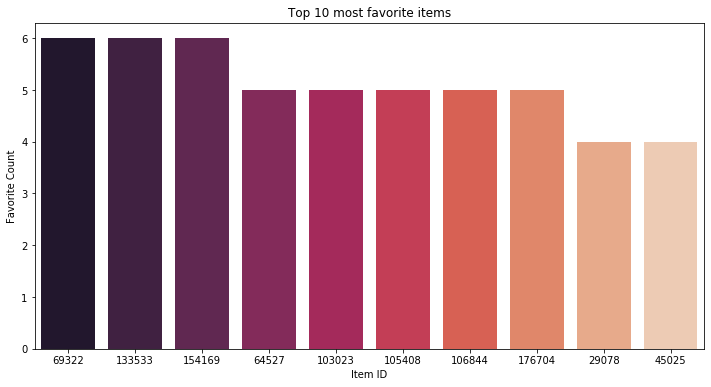

In [14]:
#sorting the dictionary
sort_fav_items = sorted(count_fav_items.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Item IDs
x_fav = [i[0] for i in sort_fav_items[:10]]

# y-axis: Favorite count
y_fav = [i[1] for i in sort_fav_items[:10]]

plt.figure(figsize=(12,6))
ax_fav = sns.barplot(x=x_fav, y=y_fav, order=x_fav, palette="rocket")
plt.title("Top 10 most favorite items")
plt.xlabel("Item ID")
plt.ylabel("Favorite Count")

In [0]:
#See the most transacted items
buy_items = grouped_behavior['buy']

#convert bought items to numpy array
buy_items = np.array(buy_items[:])

#counting uniques values of bought items
buy_unique, buy_counts = np.unique(buy_items, return_counts=True)

# Dictionary with key as unique and value as counts
count_buy_items = {}
count_buy_items = dict(zip(buy_unique, buy_counts))

Text(0, 0.5, 'Transaction Count')

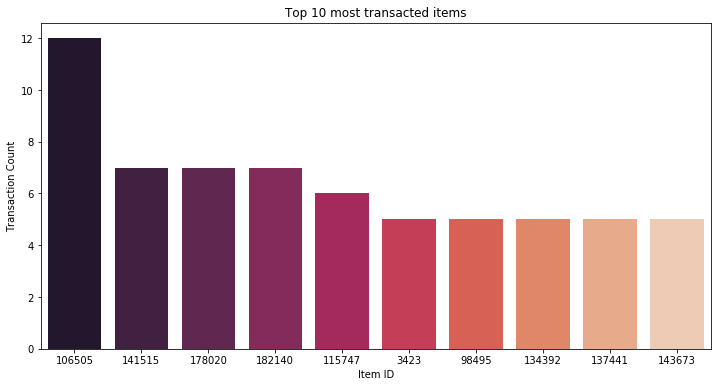

In [16]:
#sorting the dictionary
sort_buy_items = sorted(count_buy_items.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Item IDs
x_buy = [i[0] for i in sort_buy_items[:10]]

# y-axis: Favorite count
y_buy = [i[1] for i in sort_buy_items[:10]]

plt.figure(figsize=(12,6))
ax_buy = sns.barplot(x=x_buy, y=y_buy, order=x_buy, palette="rocket")
plt.title("Top 10 most transacted items")
plt.xlabel("Item ID")
plt.ylabel("Transaction Count")

You will notice from the bar graphs that the top 10 most transacted items are very different from the top 10 most favourite, most viewed and most add to cart items.  This shows that more often than not, users may display interest in certain items, but end up not buying them.

In [0]:
#Group category by its user behavior
grouped_cat_behavior = tb_final.groupby('behavior_type')['category'].apply(list)
#grouped_cat_behavior

In [0]:
#See the most viewed categories
cat_pv = grouped_cat_behavior['pv']

#convert cat_pv to numpy array
cat_pv = np.array(cat_pv[:])

#counting uniques values of page views
pv_unique, pv_counts = np.unique(cat_pv, return_counts=True)

# Dictionary with key as unique and value as counts
count_cat_views = {}
count_cat_views = dict(zip(pv_unique, pv_counts))

Text(0, 0.5, 'View Count')

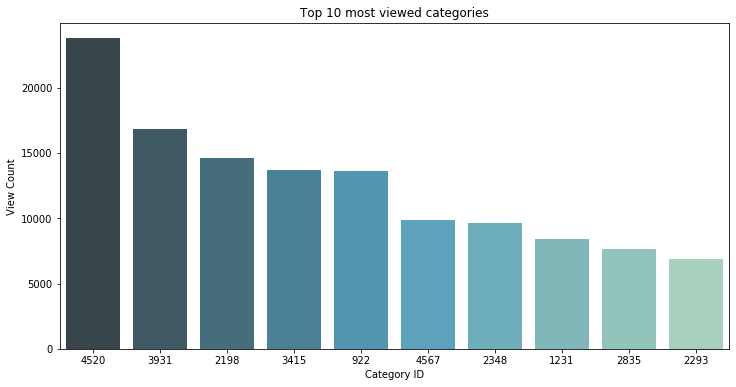

In [21]:
import operator
#sorting the dictionary
sort_cat_views = sorted(count_cat_views.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Category IDs
x_pv = [i[0] for i in sort_cat_views[:10]]

# y-axis: count of views
y_pv = [i[1] for i in sort_cat_views[:10]]

plt.figure(figsize=(12,6))
ax = sns.barplot(x=x_pv, y=y_pv, order=x_pv, palette="GnBu_d")
plt.title("Top 10 most viewed categories")
plt.xlabel("Category ID")
plt.ylabel("View Count")

In [0]:
#See the most add to cart categories
cat_cart = grouped_cat_behavior['cart']

#convert cat_cart to numpy array
cat_cart = np.array(cat_cart[:])

#counting uniques values of cart
cart_unique, cart_counts = np.unique(cat_cart, return_counts=True)

# Dictionary with key as unique and value as counts
count_cat_cart = {}
count_cat_cart = dict(zip(cart_unique, cart_counts))

Text(0, 0.5, 'Cart Count')

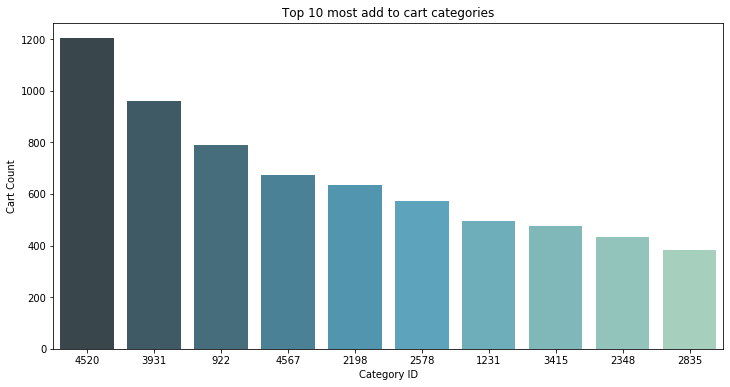

In [23]:
#sorting the dictionary
sort_cat_cart = sorted(count_cat_cart.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Category IDs
x_cart = [i[0] for i in sort_cat_cart[:10]]

# y-axis: count of carts
y_cart = [i[1] for i in sort_cat_cart[:10]]

plt.figure(figsize=(12,6))
ax = sns.barplot(x=x_cart, y=y_cart, order=x_cart, palette="GnBu_d")
plt.title("Top 10 most add to cart categories")
plt.xlabel("Category ID")
plt.ylabel("Cart Count")

In [0]:
#See the most favorite categories
cat_fav = grouped_cat_behavior['fav']

#convert cat_fav to numpy array
cat_fav = np.array(cat_fav[:])

#counting uniques values of fav
fav_unique, fav_counts = np.unique(cat_fav, return_counts=True)

# Dictionary with key as unique and value as counts
count_cat_fav = {}
count_cat_fav = dict(zip(fav_unique, fav_counts))

Text(0, 0.5, 'Favorite Count')

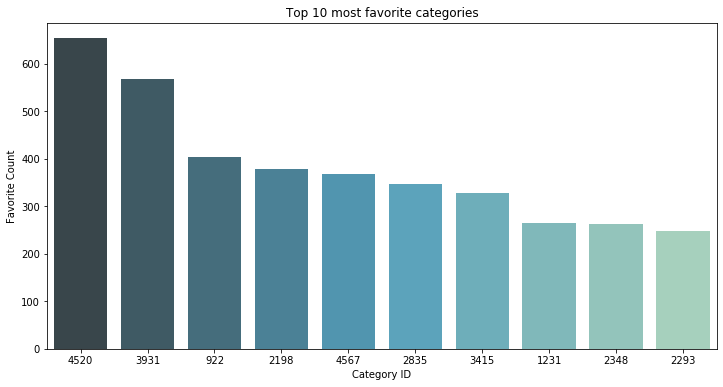

In [25]:
#sorting the dictionary
sort_cat_fav = sorted(count_cat_fav.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Category IDs
x_fav = [i[0] for i in sort_cat_fav[:10]]

# y-axis: count of favorites
y_fav = [i[1] for i in sort_cat_fav[:10]]

plt.figure(figsize=(12,6))
ax = sns.barplot(x=x_fav, y=y_fav, order=x_fav, palette="GnBu_d")
plt.title("Top 10 most favorite categories")
plt.xlabel("Category ID")
plt.ylabel("Favorite Count")

In [0]:
#See the most bought categories
cat_buy = grouped_cat_behavior['buy']

#convert cat_buy to numpy array
cat_buy = np.array(cat_buy[:])

#counting uniques values of fav
buy_unique, buy_counts = np.unique(cat_buy, return_counts=True)

# Dictionary with key as unique and value as counts
count_cat_buy = {}
count_cat_buy = dict(zip(buy_unique, buy_counts))

Text(0, 0.5, 'Transaction Count')

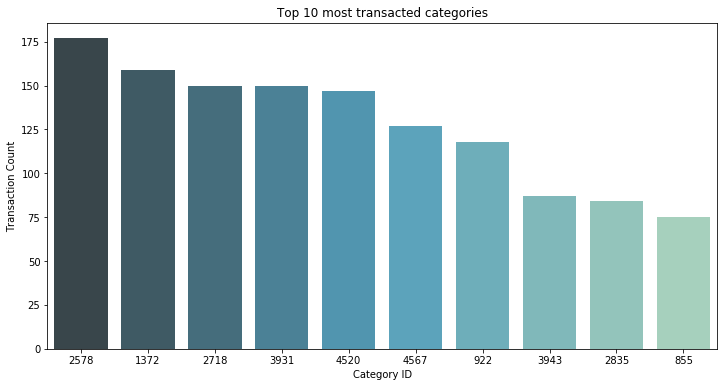

In [27]:
#sorting the dictionary
sort_cat_buy = sorted(count_cat_buy.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Category IDs
x_buy = [i[0] for i in sort_cat_buy[:10]]

# y-axis: count of transactions
y_buy = [i[1] for i in sort_cat_buy[:10]]

plt.figure(figsize=(12,6))
ax = sns.barplot(x=x_buy, y=y_buy, order=x_buy, palette="GnBu_d")
plt.title("Top 10 most transacted categories")
plt.xlabel("Category ID")
plt.ylabel("Transaction Count")

In [0]:
#Most active users
users = tb_final['user']

#convert users to numpy array
users = np.array(users[:])

#counting uniques values of userIDs
users_unique, users_counts = np.unique(users, return_counts=True)

# Dictionary with key as unique and value as counts
count_user_id = {}
count_user_id = dict(zip(users_unique, users_counts))

Text(0, 0.5, 'User Activity Count')

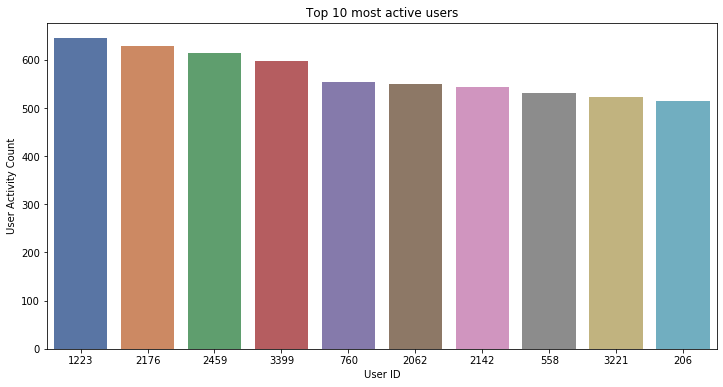

In [29]:
#sorting the dictionary
sort_users = sorted(count_user_id.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Item IDs
x_users = [i[0] for i in sort_users[:10]]

# y-axis: Favorite count
y_users = [i[1] for i in sort_users[:10]]

plt.figure(figsize=(12,6))
ax_users = sns.barplot(x=x_users, y=y_users, order=x_users, palette="deep")
plt.title("Top 10 most active users")
plt.xlabel("User ID")
plt.ylabel("User Activity Count")

In [0]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [34]:
tb_final[tb_final['user']==1223].item.value_counts()

228348    9
88980     8
41567     8
192412    7
119765    7
35216     6
127345    5
3621      5
43124     5
67120     5
17921     5
83895     4
44797     4
214183    4
108617    4
179313    3
213331    3
37239     3
128316    3
228509    3
109958    3
103138    3
180997    3
186336    3
147917    3
11724     3
44715     3
39173     3
124170    2
81563     2
207529    2
64386     2
165419    2
208234    2
75892     2
21188     2
178124    2
221550    2
150205    2
153247    2
152198    2
31066     2
230698    2
157491    2
202330    2
133933    2
70861     2
172362    2
9358      2
185949    2
14625     2
122006    2
228642    2
89738     2
100651    2
80467     2
138595    2
126570    2
145350    2
71730     2
124117    2
7618      2
30655     2
227006    2
125431    2
69638     2
80082     2
18412     2
209823    2
66062     2
212979    2
77847     2
196378    2
193949    1
32046     1
46411     1
68401     1
67995     1
33193     1
119077    1
91432     1
32041     1
10663     1
1796

It seems like the most active user is not subscribing to the top user behavioral trends i.e. popular item page views, favorites, add to cart and purchases.

In [35]:
#Number of users who actually bought something from taobao
user_purchased = tb_final[tb_final['behavior_type']=='buy'].user_id.unique()
user_purchased.size

3224

In [36]:
len(tb_final['user'].unique())

4831

Out of 4831 users, 3224 of them actually purchased an item or more on taobao.

Create heatmaps of the top 3 most active users to discover the relationship between features.

In [0]:
tb_user_1223 = tb_final[tb_final['user']==1223]
tb_user_2176 = tb_final[tb_final['user']==2176]
tb_user_2459 = tb_final[tb_final['user']==2459]


In [0]:
#Dummy the column ('behavior_type') for top 3 active users.
tb_user_1223 = pd.get_dummies(tb_user_1223, columns=['behavior_type'])
tb_user_2176 = pd.get_dummies(tb_user_2176, columns=['behavior_type'])
tb_user_2459 = pd.get_dummies(tb_user_2459, columns=['behavior_type'])

In [0]:
def heat_map(df):
  df.drop(columns = ['user_id', 'item_id', 'category_id'], inplace=True)
  fix, ax = plt.subplots(figsize=(6,6))
  corr = df.corr()

  # Generate a mask for the upper triangle 
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  # Plot the heatmap with seaborn.
  # Assign the matplotlib axis the function returns. This will let us resize the labels.
  ax = sns.heatmap(corr, mask=mask, ax=ax, cmap='coolwarm')

  # Resize the labels.
  ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
  ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

  return plt.show()

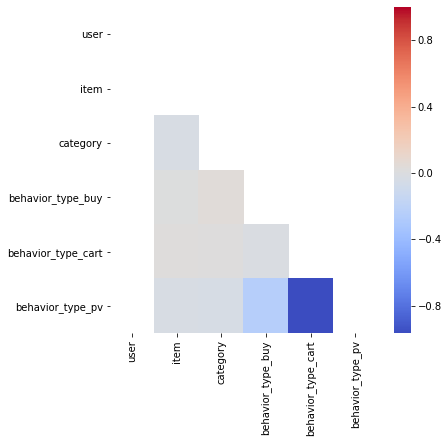

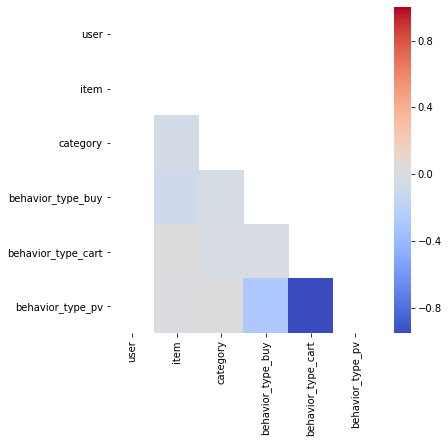

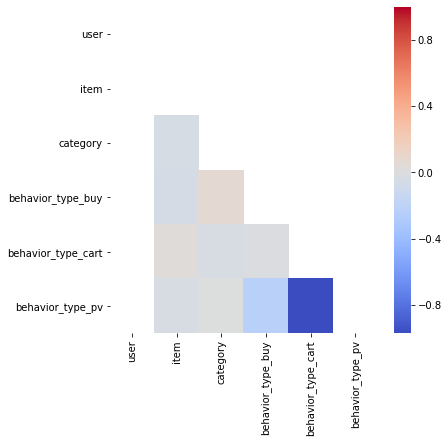

In [45]:
heat_map(tb_user_1223)
heat_map(tb_user_2176)
heat_map(tb_user_2459)

From the heatmap, there is significant correlation between page view and cart. This indicates that there is a high tendency of a user who viewed an item to add it to cart first. This indicates that most users are conservative buyers and may hesitate to purchase the items due to possible factors such as cost. However, this may not lead to a purchase. The heatmaps show that the relationship between page view and buy is weak.

Conclusion:

For new vistors to the website, we do not have their user behavior information hence we will not be able to recommend products according to their liking. Instead, we could focus on recommending them popular products (as a baseline). Product popularity could be in terms of the top 10 most viewed items, top 10 most add to cart items, top 10 most transacted items and/or top 10 most favorite items. We can also recommend top 10 most viewed/add to cart/favorite/transacted item categories, depending on granularity of the recommendation.